# Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [5]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

Text(0, 0.5, 'Y')

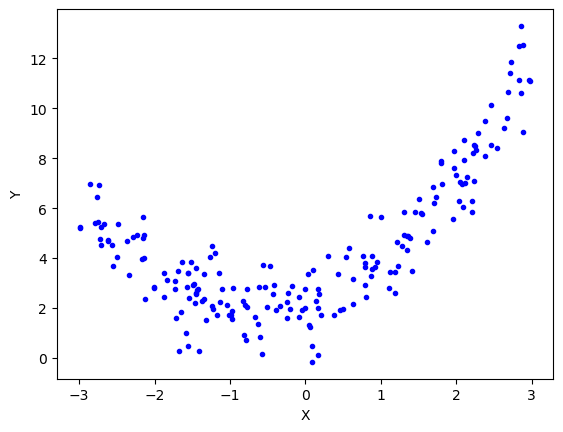

In [17]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')

## Using Simple Linear Model

In [22]:
lr = LinearRegression()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 12)

In [28]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.41031315519417355

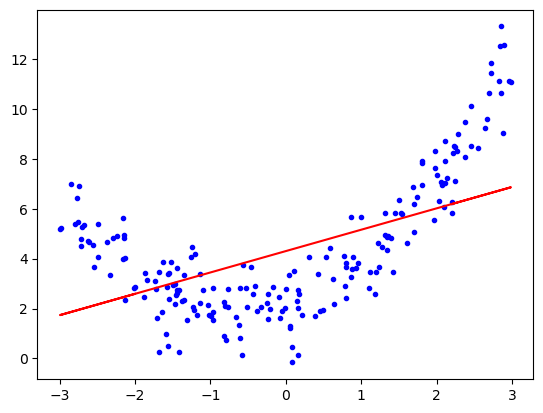

In [32]:
plt.plot(X,y,'b.')
plt.plot(X_train,lr.predict(X_train),color = 'r')

## Applying Polynomial Linear Regression

In [35]:
poly = PolynomialFeatures(degree = 2)

In [41]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [45]:
print(X_train[0])
print(X_train_poly[0])

[-2.00205871]
[ 1.         -2.00205871  4.00823908]


In [49]:
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred = lr.predict(X_test_poly)
r2_score(y_test,y_pred)

0.927606926083385

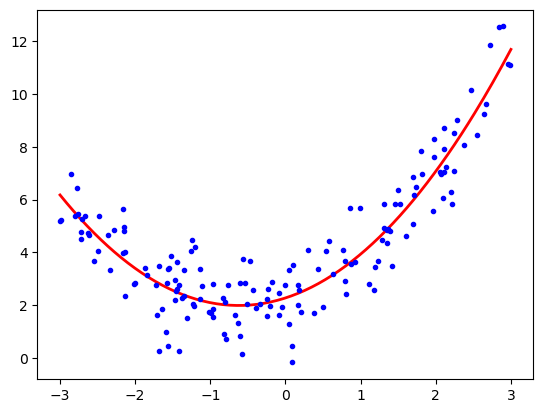

In [59]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')

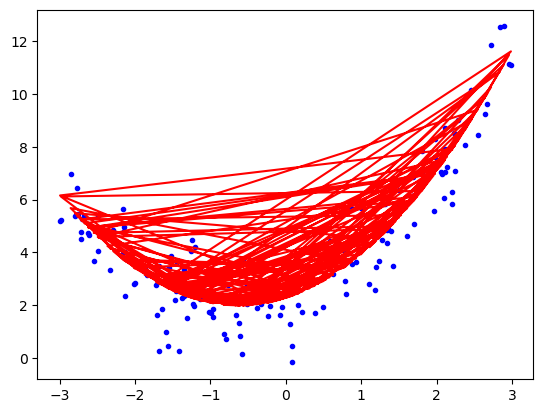

In [73]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_train,lr.predict(X_train_poly),'r')

In [79]:
from sklearn.pipeline import Pipeline

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

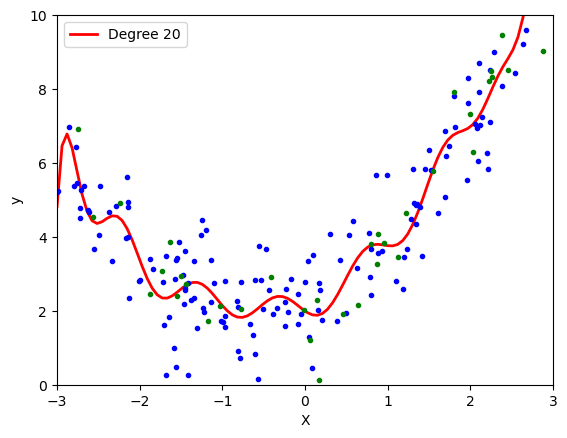

In [85]:
polynomial_regression(20)